<a href="https://colab.research.google.com/github/ThomasAlbin/Astroniz-YT-Tutorials/blob/main/CompressedCosmos/CompressedCosmos_VoyagerVelocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spiceypy

In [2]:
!wget -O Voyager_1.a54206u_V0.2_merged.bsp https://naif.jpl.nasa.gov/pub/naif/VOYAGER/kernels/spk/Voyager_1.a54206u_V0.2_merged.bsp
!wget -O Voyager_2.m05016u.merged.bsp https://naif.jpl.nasa.gov/pub/naif/VOYAGER/kernels/spk/Voyager_2.m05016u.merged.bsp
!wget -O naif0012.tls https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls

--2025-09-22 13:24:22--  https://naif.jpl.nasa.gov/pub/naif/VOYAGER/kernels/spk/Voyager_1.a54206u_V0.2_merged.bsp
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.79.133.14
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.79.133.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6374400 (6.1M) [model/vnd.valve.source.compiled-map]
Saving to: ‘Voyager_1.a54206u_V0.2_merged.bsp’

Voyager_1.a54206u_V 100%[===================>]   6.08M  3.73MB/s    in 1.6s    

2025-09-22 13:24:24 (3.73 MB/s) - ‘Voyager_1.a54206u_V0.2_merged.bsp’ saved [6374400/6374400]

--2025-09-22 13:24:24--  https://naif.jpl.nasa.gov/pub/naif/VOYAGER/kernels/spk/Voyager_2.m05016u.merged.bsp
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.79.133.14
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.79.133.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6447104 (6.1M) [model/vnd.valve.source.compiled-map]
Saving to: ‘Voyager_2.m05016u.merged.

In [3]:
import glob
import pathlib
import os

import spiceypy as spice
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# list kernel files
kernel_paths = [p for p in pathlib.Path('/content').glob('[!.]*') if os.path.isfile(p)]
kernel_paths

[PosixPath('/content/Voyager_1.a54206u_V0.2_merged.bsp'),
 PosixPath('/content/Voyager_2.m05016u.merged.bsp'),
 PosixPath('/content/naif0012.tls')]

In [5]:
# load kernels
spice.furnsh(str(p) for p in kernel_paths)

In [6]:
# Voyager 1 & 2 preparation
voy1_start_utc = "1977 SEP 05 13:59:24.383"
voy2_start_utc = "1977 AUG 20 15:32:32.182"

end_utc = "2026 JAN 01 12:00:00.00"

# Convert to ET
voy1_start_et = spice.str2et(voy1_start_utc)
voy2_start_et = spice.str2et(voy2_start_utc)
end_et = spice.str2et(end_utc)

# Create ET array with 10.000 values
voy1_et_array = np.linspace(voy1_start_et, end_et, 10000)
voy2_et_array = np.linspace(voy2_start_et, end_et, 10000)

In [7]:
# Create arrays with helicentric values of the Voyager probes
voy1_heliocentric_vel = []
voy2_heliocentric_vel = []

# Create array for the heliocentric distance
voy1_heliocentric_dist = []
voy2_heliocentric_dist = []

for k in voy1_et_array:
    _state, _ = spice.spkgeo(targ=-31,
                             et=k,
                             ref="ECLIPJ2000",
                             obs=0)
    voy1_heliocentric_vel.append(np.linalg.norm(_state[3:]))
    voy1_heliocentric_dist.append(np.linalg.norm(_state[:3]))

for k in voy2_et_array:
    _state, _ = spice.spkgeo(targ=-32,
                             et=k,
                             ref="ECLIPJ2000",
                             obs=0)
    voy2_heliocentric_vel.append(np.linalg.norm(_state[3:]))
    voy2_heliocentric_dist.append(np.linalg.norm(_state[:3]))

# Convert the results to numpy array
voy1_heliocentric_dist = np.array(voy1_heliocentric_dist)
voy2_heliocentric_dist = np.array(voy2_heliocentric_dist)

voy1_heliocentric_vel = np.array(voy1_heliocentric_vel)
voy2_heliocentric_vel = np.array(voy2_heliocentric_vel)

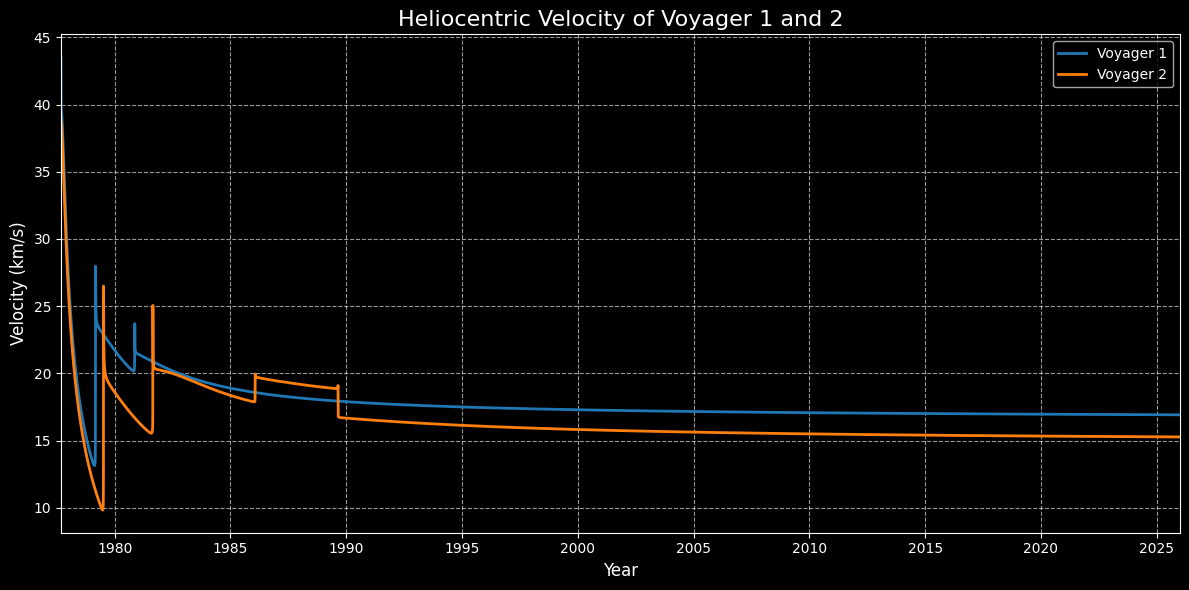

In [8]:
# Convert ET array to datetime objects and extract year
voy1_utc = [spice.et2datetime(k) for k in voy1_et_array]
voy2_utc = [spice.et2datetime(k) for k in voy2_et_array]

# Set plot style to dark mode
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(voy1_utc, voy1_heliocentric_vel, label='Voyager 1', color='#1f77b4', linewidth=2)
plt.plot(voy2_utc, voy2_heliocentric_vel, label='Voyager 2', color='#ff7f0e', linewidth=2)

# Add titles and labels with enhanced readability
plt.title('Heliocentric Velocity of Voyager 1 and 2', fontsize=16, color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Velocity (km/s)', fontsize=12, color='white')

# Improve tick visibility and grid
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(fontsize=10)

# Set x lim
plt.xlim(voy1_utc[0], voy1_utc[-1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

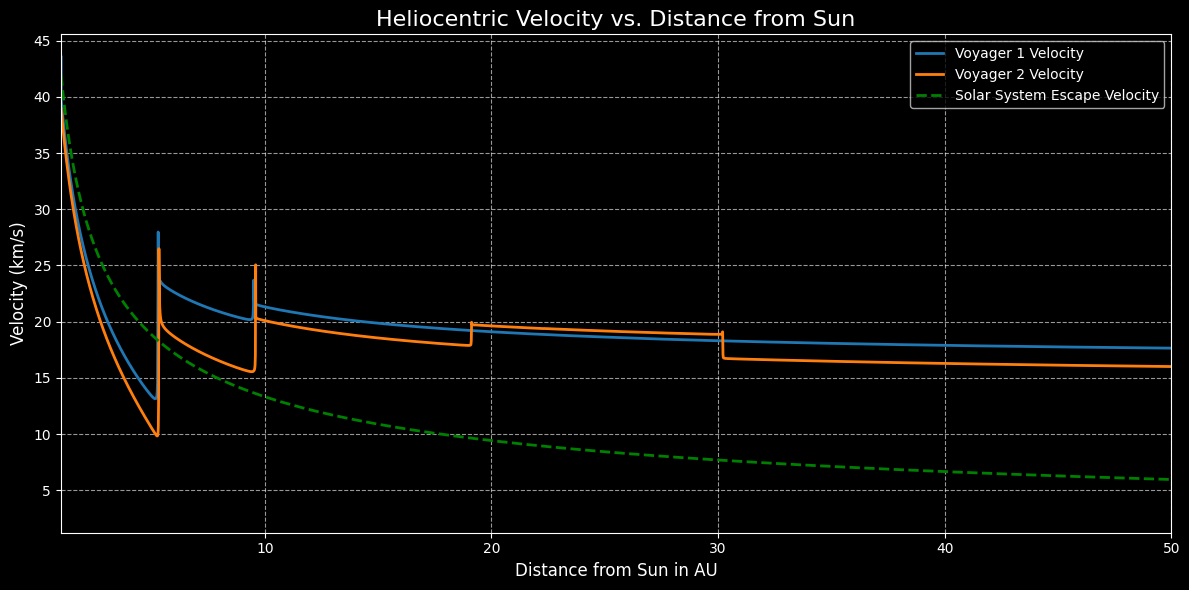

In [9]:
# Constants
G = 6.67e-11  # Gravitational constant
M_sun = 1.99e30  # Mass of the Sun in kg
one_au = 149_597_871 # kilometers

# Calculate escape velocity for a range of distances
# Use the range of heliocentric distances of the Voyagers
escape_distances = np.linspace(min(min(voy1_heliocentric_dist), min(voy2_heliocentric_dist)),
                               max(max(voy1_heliocentric_dist), max(voy2_heliocentric_dist)), 10000)
escape_velocities = np.sqrt(2 * G * M_sun / (escape_distances * 1000))
escape_velocities /= 1000.0

# Set plot style to dark mode
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(voy1_heliocentric_dist / one_au, voy1_heliocentric_vel,
         label='Voyager 1 Velocity', color='#1f77b4', linewidth=2)
plt.plot(voy2_heliocentric_dist / one_au, voy2_heliocentric_vel,
         label='Voyager 2 Velocity', color='#ff7f0e', linewidth=2)
plt.plot(escape_distances / one_au, escape_velocities,
         label='Solar System Escape Velocity', color='green', linestyle='--', linewidth=2)


# Add titles and labels with enhanced readability
plt.title('Heliocentric Velocity vs. Distance from Sun', fontsize=16, color='white')
plt.xlabel('Distance from Sun in AU', fontsize=12, color='white')
plt.ylabel('Velocity (km/s)', fontsize=12, color='white')

# Improve tick visibility and grid
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(fontsize=10)

# Set x lim
plt.xlim(1, 50)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()